## PCA - Wine

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()

In [9]:
# wine data를 표준화
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)
wine_std[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

In [11]:
wine.data.shape

(178, 13)

### 차원축소
- 13 차원 --> 2차원, 4차원, 6차원

In [ ]:
wine_cov = np.dot(wine_std.T, wine_std) / (len(wine_std) -1)
wine_cov

In [16]:
# 2차원
from sklearn.decomposition import PCA
pca2 = PCA(2)
wine_pca2 = pca2.fit_transform(wine_std)
wine_pca2[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [21]:
pca2.explained_variance_ratio_ 

array([0.36198848, 0.1920749 ])

In [22]:
pca2.explained_variance_ratio_.sum()

0.5540633835693534

In [18]:
# 4차원
from sklearn.decomposition import PCA
pca4 = PCA(4)
wine_pca4 = pca4.fit_transform(wine_std)
wine_pca4[:5]

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231],
       [ 3.75706561, -2.75637191, -0.17619184,  0.56798331],
       [ 1.00890849, -0.86983082,  2.02668822, -0.40976579]])

In [26]:
pca4.explained_variance_ratio_, pca4.explained_variance_ratio_.sum()

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ]), 0.735989990758993)

In [23]:
# 6차원
from sklearn.decomposition import PCA
pca6 = PCA(6)
wine_pca6 = pca6.fit_transform(wine_std)
wine_pca6[:5]

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284,
        -0.22388013],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832, -0.25765463,
        -0.92712024],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231, -0.25103312,
         0.54927605],
       [ 3.75706561, -2.75637191, -0.17619184,  0.56798331, -0.31184159,
         0.114431  ],
       [ 1.00890849, -0.86983082,  2.02668822, -0.40976579,  0.2984575 ,
        -0.4065196 ]])

In [27]:
pca6.explained_variance_ratio_, pca6.explained_variance_ratio_.sum()

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
        0.04935823]), 0.8509811607477046)

### 2. PCA 전후 비교

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [30]:
# 원본 데이터로 분류
X_train,X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify = wine.target,random_state = 2022
)
rfc = RandomForestClassifier(random_state = 2022)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

1.0

In [35]:
# 2차원으로 축소한 데이터로 분류
X_train,X_test, y_train, y_test = train_test_split(
    wine_pca2, wine.target, stratify = wine.target,random_state = 2022
)
rfc2 = RandomForestClassifier(random_state = 2022)
rfc2.fit(X_train, y_train)
rfc2.score(X_test, y_test)

1.0

In [36]:
# 4차원으로 축소한 데이터로 분류
X_train,X_test, y_train, y_test = train_test_split(
    wine_pca4, wine.target, stratify = wine.target,random_state = 2022
)
rfc4 = RandomForestClassifier(random_state = 2022)
rfc4.fit(X_train, y_train)
rfc4.score(X_test, y_test)

1.0

### 3. 시각화

In [39]:
df = pd.DataFrame(wine_pca2, columns = ["PC1", "PC2"])
df["target"] = wine.target
df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


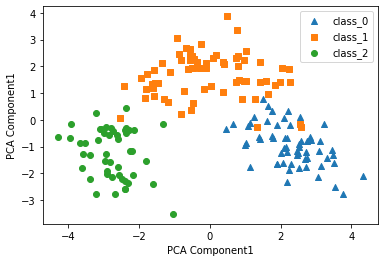

In [40]:
# PC1, PC2 시각화(품종별로 마커의 색깔과 모양을 달리해서 표현)
markers = ["^", "s", "o"]
for i, marker in enumerate(markers):
  x_data = df[df["target"] == i]["PC1"]
  y_data = df[df["target"] == i]["PC2"]
  plt.scatter(x_data, y_data, marker = marker, label = wine.target_names[i])

plt.legend()
plt.xlabel("PCA Component1"), plt.ylabel("PCA Component1")
plt.show()


### 4. Code refactoring

In [42]:
def pca_accuracy(X,y):
    X_train,X_test, y_train, y_test = train_test_split(
        X, y, stratify = y, random_state = 2022
    )
    rfc = RandomForestClassifier(random_state = 2022)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    return score

In [43]:
for n in [2,4,6] :
  pca = PCA(n_components = n)
  wine_pca = pca.fit_transform(wine_std)
  explained = pca.explained_variance_ratio_.sum()
  acc = pca_accuracy(wine_pca, wine.target)
  print(f"PCA{n}: 설명력-{explained:.4f}, 정확도-{acc:.4f}")


PCA2: 설명력-0.5541, 정확도-1.0000
PCA4: 설명력-0.7360, 정확도-1.0000
PCA6: 설명력-0.8510, 정확도-1.0000
